In [1]:
"""
PS4 Q2
@author: Patrick Horlaville
March 24th 2022
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

We make use of Prof Eve Lee's code snippets as well as content from Lecture 15.2 Shock Jump Conditions to establish our initial conditions and our functions to solve for the shock


In [3]:
Ngrid = 100
Nsteps = 2500
dt = 0.01
dx = 2.0
gamma = 5/3 

In [4]:
x = np.arange(Ngrid)*dx # position grid
f1 = np.ones(Ngrid) # this will be rho
f2 = np.zeros(Ngrid) # this will be rho*u
u = np.zeros(Ngrid + 1) # advective velocity
E = np.ones(Ngrid) # this will be rho*energy
pressure = (gamma - 1)/gamma * (E - (f2**2/f1)/2) # by algebra, we can find an expression for pressure
cs2 = (pressure*gamma)/f1 # this is c_s^2 since the shock is adiabatic
u_i = f2/f1 # velocity, given how we constructed f1 and f2
mach_initial = u_i/np.sqrt(cs2) # Mach number

In [5]:
# This is Prof Lee's advection function
def advection(f, u, dt, dx):
    J = np.zeros(len(f)+1) # keeping the first and the last term zero
    J[1:-1] = np.where(u[1:-1] > 0, f[:-1] * u[1:-1], f[1:] * u[1:-1])
    f = f - (dt / dx) * (J[1:] - J[:-1]) #update
    return f   

In [6]:
# Need to add pressure gradient
def grad(f, p):
    f[1:-1] = f[1:-1] -  (1/2)*(dt/dx)*(p[2:] - p[:-2]) 

In [7]:
# Will need to correct source terms at boundary    
def bc(f, p):
    f[0] = f[0] - (1/2)*(dt/dx)*(p[1] - p[0]) 
    f[-1] = f[-1] - (1/2)*(dt/dx)*(p[-1] - p[-2])
    
def bc2(E, p):
    E[0] = E[0] -  (1/2)*(dt/dx)*(p[1] - p[0]) 
    E[-1] = E[-1] -  (1/2)*(dt/dx)*(p[-1] - p[-2])

In [8]:
# Will allow to re-compute advection velocity     
def advection_vel(u, f, g):
    u[1:-1] = 0.5 * ((g[:-1]/f[:-1]) + (g[1:]/f[1:]))

In [9]:
# We want an initial Gaussian perturbation
mag, sigma = 10000, Ngrid/10
E = E + mag*np.exp(-((x - x.max()/2)** 2)/(sigma** 2))

## We can now plot the shock evolution using the defined functions

<IPython.core.display.Javascript object>


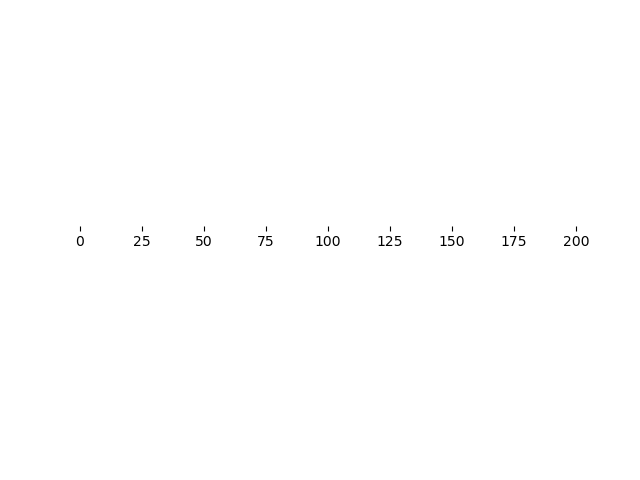

In [10]:
plt.ion()
fig, ax = plt.subplots(2,1)

# Density plot
x1, = ax[0].plot(x, f1)
ax[0].set_xlim([0, dx*Ngrid])
ax[0].set_ylim([0, 5])
ax[0].set_ylabel(r'$\rho$')

# Mach plot
x2, = ax[1].plot(x, mach_initial)
ax[1].set_xlim([0, dx*Ngrid])
ax[1].set_ylim([-4, 4])
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$\mathcal{M}$')

fig.canvas.draw()

for ct in range(Nsteps):
    
    # we have advection velocity @ interface
    u[1:-1] = (1/2)*((f2[:-1] / f1[:-1])+(f2[1:] / f1[1:])) 
    # which gives density and momentum
    f1 = advection(f1, u, dt, dx)
    f2 = advection(f2, u, dt, dx)

    # Also influences pressure and c_s^2
    pressure = ((gamma - 1)/gamma)*(E - (1/2)*(f2**2)/f1)
    cs2 = gamma*pressure/f1
    
    # Use our functions for the pressure grad and boundary conditions
    grad(f2, pressure)
    bc(f2, pressure)

    # Let's try to now use our method to get the advection velocity and use it to advect the energy
    advection_vel(u, f1, f2) 
    E = advection(E, u, dt, dx)

    #Now we need to recalculate the pressure and velocity
    pressure = (gamma - 1)/gamma * (E - 0.5*f2**2/f1)
    velocity = f2/f1
    ## allows us to compute the energy gradient and imposing the correct boundary conditions
    p_e = pressure*velocity
    grad(E, p_e)
    bc2(E, p_e)

    # again updating the pressure and sound speed values so that we can obtain the mach number to plot. 
    pressure = (gamma - 1)/gamma * (E - 0.5*f2**2/f1)
    cs2 = gamma * pressure / f1
    velocity= f2/f1
    mach = velocity/np.sqrt(cs2)
    
    
    #plot the data 
    x1.set_ydata(f1)
    x2.set_ydata(mach)
    fig.canvas.draw()
    plt.pause(0.001)

In class, we derived the ratio of densities pre- and post-shock to be 1/4 for gamma = 5/3. As shown by the animation, the evolution of the density plot displays a similar amplitude change.